In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, bernoulli

Let $X \sim U[0,1]$ and 

\begin{equation}
Y_i=\sin ^3\left(2 \pi X_i^3\right)+\sigma \left(x_{i}\right)\varepsilon_i,
\end{equation}

where $\varepsilon \sim \mathcal{N} \left(0,1\right)$.

The variance function is described by

\begin{equation}
\sigma \left(x \right) = \frac{1}{2} \left(1.5-x \right)
\end{equation}

We estimate the relationship with the Nadaraya-Watson estimator

\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} Y_{i} K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} K \left(
    \frac{x-X_{i} }{h}
    \right)}.
\end{equation}

We assume that the predictor $X$ is missing at random and is observed with the probability of observation
\begin{equation}
\pi \left(y\right) = \frac{1}{1+\exp^{-\left(\beta_{0} +\beta_{1}Y_{i}\right)}}
\end{equation}

that is modelled with the logit function.

The Horwitz-Thompson estimator is 
\begin{equation}
m_{n} \left(x\right) = \frac{
\sum_{i=1}^{n} 
\frac{\Omega_{i}Y_{i}}{
\pi \left(Y_{i} \right)
}
 K \left(
    \frac{x-X_{i} }{h}
    \right)
}{\sum_{i=1}^{n} 
\frac{\Omega_{i}}{
\pi \left(Y_{i} \right)
}
K \left(
    \frac{x-X_{i} }{h}
    \right)},
\end{equation}

In [2]:
#Setting 
#Hyperparameter set-up

n = 10000
h=0.01
eps = np.random.normal(0, 0.7,  n)

#Data generation 
X = np.random.uniform(0,1,n)
X.sort()

In [3]:
#functions 

def sigma(t):
    return 0.5*(1.5-t)

def mf(X):
    return (np.sin(2*np.pi*(X)**3))**3 + sigma(X)*eps 

def nw(h,x,X,y):
    num = sum(y*norm.pdf((x-X)/h))
    dem = sum(norm.pdf((x-X)/h))
    return num/dem

def pi(y,b0,b1):
    lin = b0 + b1 *y 
    return 1/(1+np.exp(-lin))

def pi_hat(h,y_i,Y,p):
    omega = bernoulli.rvs(p, size=n)
    num = sum(omega*norm.pdf((y_i-Y)/h))
    dem = sum(norm.pdf((y_i-Y)/h))
    return num/dem

def nw_mis(h,x,X,y,p):
    omega = bernoulli.rvs(p, size=n)
    y = (y*omega)/p
    num = sum(y*norm.pdf((x-X)/h))
    dem = sum(omega*norm.pdf((x-X)/h))
    return num/dem

In [4]:
y = mf(X)

#Simulate missing values 
#MCAR
#p=0.8
#omega = bernoulli.rvs(p=0.9, size=n)

pi_hat = [pi_hat(h,z,y,pi(y,1,1)) for z in np.linspace(-1.5, 2, n)]
#omega = bernoulli.rvs(pi_hat, size=n)

#y_cc = mf(X*omega)

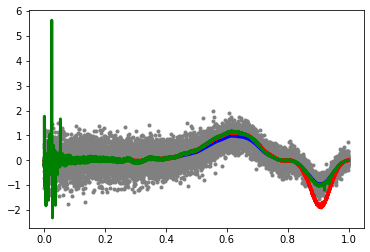

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, y, 'o', color='grey',markersize=3)
#ax.plot(X*omega,y_cc,'o',color='black',markersize=3)
ax.plot(np.linspace(0, 1, n),[nw(h,t,X,y) for t in np.linspace(0, 1, n)],color= 'blue', lw=3)
#MAR 
ax.plot(np.linspace(0, 1, n),[nw_mis(h,t,X,y,pi(y,1,1)) for t in np.linspace(0, 1, n)],'-g',color= 'red', lw=3)
#MAR estimated
ax.plot(np.linspace(0, 1, n),[nw_mis(h,t,X,y,pi_hat) for t in np.linspace(0, 1, n)],'-g',color= 'green', lw=3)


In [ ]:
#We need to simulate MAR missing values in the predictor 
p = pi(y,b0=1,b1=1)
omega = bernoulli.rvs(p, size=n)
y_hat = [nw_mis(h,t,X,y,p) for t in np.linspace(0, 1, n)]
np.mean((y-y_hat)**2)

In [8]:
omega.sum()/len(y)

NameError: name 'omega' is not defined

In [ ]:
r =(y-np.sin(2*np.pi*(X)**3)**3)**2

def r_hat(x):
    return (y-nw(h,x,X,y))**2

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.plot(X, (sigma(X)**2)*eps**2 , 'o', color='grey',markersize=3)
ax.plot(np.linspace(0, 1, n),[nw(h,t,X,r) for t in np.linspace(0, 1, n)],color= 'blue', lw=3)
ax.plot(np.linspace(0, 1, n),[nw(h,t,X,r_hat(t)) for t in np.linspace(0, 1, n)],color= 'red', lw=3)
#ax.plot(np.linspace(0, 1, n),[nw_mis(h,t,X,r_hat(t),pi_hat) for t in np.linspace(0, 1, n)],'-g',color= 'green', lw=3)
